In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")
conn.commit()


In [4]:
sales_data = [
    ("Soap", 10, 25.0),
    ("Shampoo", 5, 120.0),
    ("Toothpaste", 8, 45.0),
    ("Soap", 6, 25.0),
    ("Shampoo", 3, 120.0)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

In [5]:
import pandas as pd

query = """
    SELECT product,
           SUM(quantity) AS total_qty,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)

      product  total_qty  revenue
0     Shampoo          8    960.0
1        Soap         16    400.0
2  Toothpaste          8    360.0


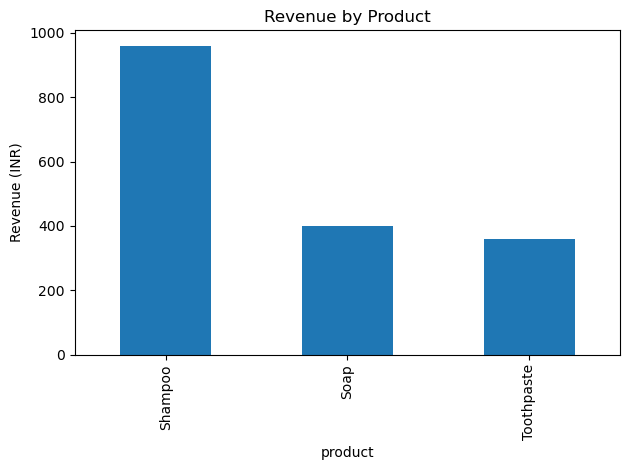

In [6]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()

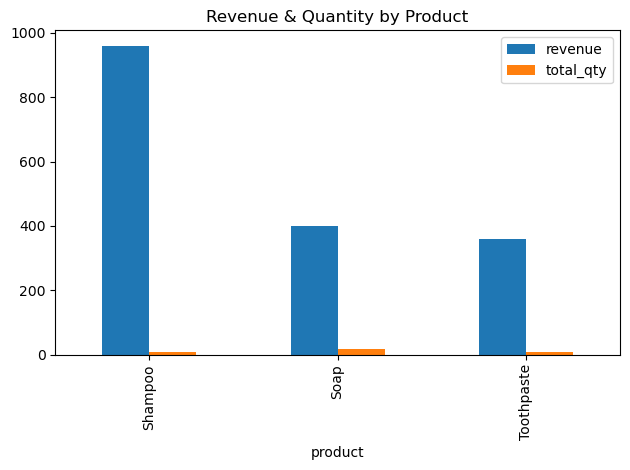

In [7]:
df.plot(kind='bar', x='product', y=['revenue', 'total_qty'])
plt.title("Revenue & Quantity by Product")
plt.tight_layout()
plt.show()

In [8]:
df.to_csv("sales_summary.csv", index=False)